# How to aproch a problem
1. Loading of the dataset
2. Preparation of the dataset
3. Definition of the model
4. Train the model
5. Evaluation of the model
6. Presentation of results.
7. Test the model

# 1. Load the data

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


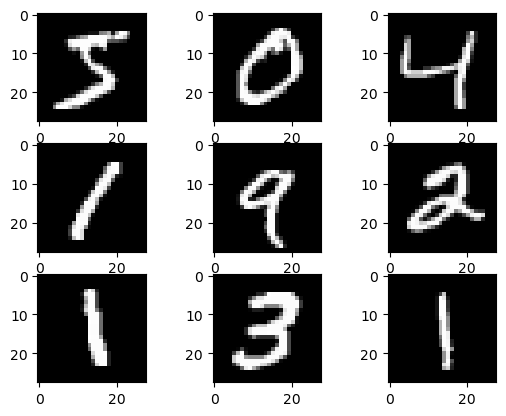

In [99]:

from tensorflow.keras.datasets import mnist
from matplotlib import pyplot as plt
# load dataset from api
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
# summarize loaded dataset
print('Train: X=%s, y=%s' % (train_images.shape, train_labels.shape))
print('Test: X=%s, y=%s' % (test_images.shape, test_labels.shape))
# plot first nine images
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# plot raw pixel data
	plt.imshow(train_images[i], cmap=plt.get_cmap('gray'))
# show the figure
plt.show()

# 2. Prep the data

In [100]:
#Normalize
train_images = train_images / 255
test_images = test_images /255
#transform labels to something that categorical_crossentropy can handel
#OBS!! only run ones
train_labels = tf.keras.utils.to_categorical(train_labels, num_classes= 10, dtype ="uint8")
test_labels = tf.keras.utils.to_categorical(test_labels, num_classes= 10, dtype ="uint8")
# Testing set labels
print(test_labels)
print(test_labels.shape)


[[0 0 0 ... 1 0 0]
 [0 0 1 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(10000, 10)


# 3. Create the model 

In [101]:

import tensorflow as tf

neural_net = tf.keras.Sequential()
neural_net.add(tf.keras.layers.Flatten(input_shape=(28,28)))
neural_net.add(tf.keras.layers.Dense(32,activation='relu'))
neural_net.add(tf.keras.layers.Dense(16,activation='relu'))
neural_net.add(tf.keras.layers.Dense(16,activation='relu'))
#Output layer
neural_net.add(tf.keras.layers.Dense(10,activation='softmax'))
#Print summery on network model
neural_net.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_13 (Flatten)        (None, 784)               0         
                                                                 
 dense_45 (Dense)            (None, 32)                25120     
                                                                 
 dense_46 (Dense)            (None, 16)                528       
                                                                 
 dense_47 (Dense)            (None, 16)                272       
                                                                 
 dense_48 (Dense)            (None, 10)                170       
                                                                 
Total params: 26,090
Trainable params: 26,090
Non-trainable params: 0
_________________________________________________________________


# 4. Train the model

In [102]:
neural_net.compile (optimizer='adam',loss='categorical_crossentropy', metrics=['Accuracy'])
model_history = neural_net.fit(train_images, train_labels, validation_split=.2, batch_size=32, epochs=10)

Epoch 1/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4757 - Accuracy: 0.8638 - val_loss: 0.2479 - val_Accuracy: 0.9292
Epoch 2/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2265 - Accuracy: 0.9341 - val_loss: 0.2055 - val_Accuracy: 0.9413
Epoch 3/10
1500/1500 [==============================] - 2s 2ms/step - loss: 0.1798 - Accuracy: 0.9464 - val_loss: 0.1742 - val_Accuracy: 0.9494
Epoch 4/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1486 - Accuracy: 0.9553 - val_loss: 0.1523 - val_Accuracy: 0.9563
Epoch 5/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1307 - Accuracy: 0.9604 - val_loss: 0.1495 - val_Accuracy: 0.9576
Epoch 6/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1186 - Accuracy: 0.9634 - val_loss: 0.1474 - val_Accuracy: 0.9572
Epoch 7/10
1500/1500 [==============================] - 2s 2ms/step - loss: 0.1063 - Accuracy: 0.9668 - val_loss: 0.1391 - val_Accuracy:

# 5. Evaluate the model

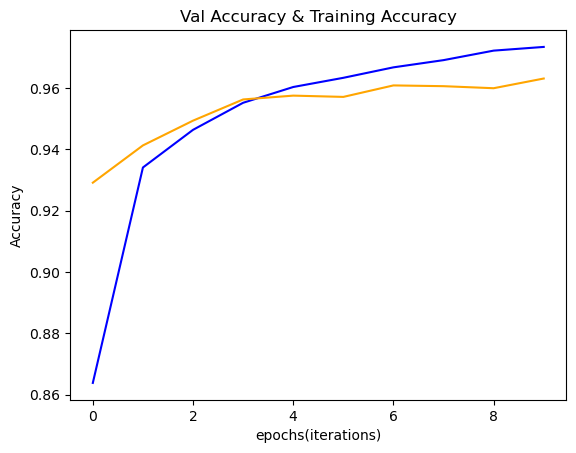

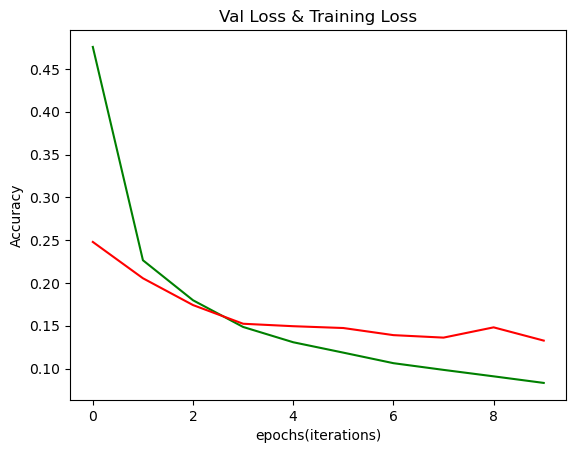

In [103]:
#Print grafs to show evalutaion
plt.title('Val Accuracy & Training Accuracy')
plt.plot(model_history.history['Accuracy'], color='blue', label='train')
plt.plot(model_history.history['val_Accuracy'], color='orange', label='test')
plt.xlabel('epochs(iterations)')
plt.ylabel('Accuracy')
plt.show()

plt.title('Val Loss & Training Loss')
plt.plot(model_history.history['loss'], color='green', label='train')
plt.plot(model_history.history['val_loss'], color='red', label='test')
plt.xlabel('epochs(iterations)')
plt.ylabel('Accuracy')
plt.show()



## 6.Present the result 

## 7. Save the model

In [104]:
neural_net.save('final_model_v2.h5')

## 7. Test the model
In this case load a random image from test data and make a prediction

8928
1/1 [==============================] - 0s 20ms/step
[[9.14398788e-06 1.49726148e-10 2.12575074e-07 7.75397712e-05
  1.87233934e-06 3.22821201e-08 3.53549884e-10 2.90449179e-06
  1.06498395e-04 9.99801815e-01]]
The predicted number is:  9


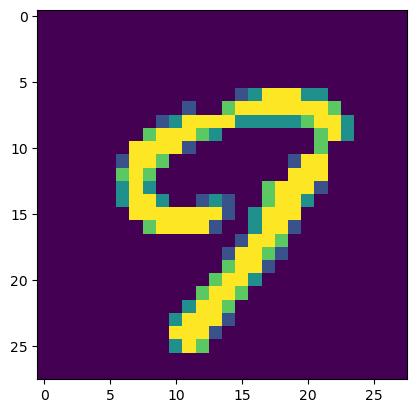

In [120]:
from numpy import argmax
import random as rand
randomimage = rand.randint(1,len(test_images))
print(randomimage)
plt.imshow(test_images[randomimage])
#from tf.keras.utils import img_to_array
img = test_images[randomimage]
# convert to array
#img = img_to_array(img)
# reshape into a single sample with 1 channel
img = img.reshape(1, 28, 28, 1)
output_prediction = neural_net.predict(img)
#print('Accuracy: mean=%.3f ' % (output_prediction*100))
print(output_prediction)
digit = argmax(output_prediction)
print("The predicted number is: ",digit)

## 8. Test the model with my own image


1/1 [==============================] - 0s 19ms/step
The predicted number is:  7


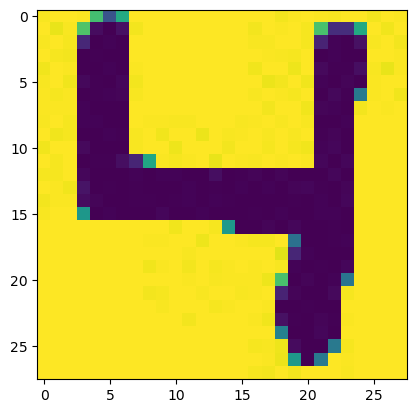

In [119]:
# make a prediction for a new image.
from numpy import argmax
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
from tensorflow.keras.models import load_model

img = load_img('4.jpg',color_mode="grayscale")
#plot image
plt.imshow(img)#, cmap=plt.get_cmap('gray'))
# convert to array
img = img_to_array(img)
# reshape into a single sample with 1 channel
img = img.reshape(1, 28, 28, 1)

# prepare pixel data
img = img.astype('float32')
img = img / 255.0
#print (img)

# load model
#model = load_model('final_model.h5')
# predict the class
predict_value = neural_net.predict(img)
digit = argmax(predict_value)
print("The predicted number is: ",digit)
